In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Input dataset
data = pd.read_csv('../input/HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Data Preprocessing
data.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
#Exploratory Data Analysis
data.describe()
# avg monthly hours distribution is not uniform

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
#Impact of numerical variables
data.groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
#Insights:
  #satisfaction level of left seems low(0.44) than employee who retained(0.66)
  #Avg monthly hours of left seems high(199) than employee who retained(207)
  #promotion is 0(approx) for employee who left
#ignore other numerical columns which provides same impact
  

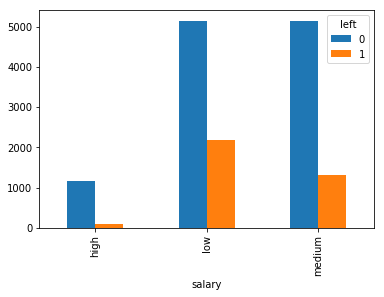

In [9]:
#Analyse impact of categorical value on left
#Analyse salary
pd.crosstab(data['salary'],data['left']).plot(kind='bar')

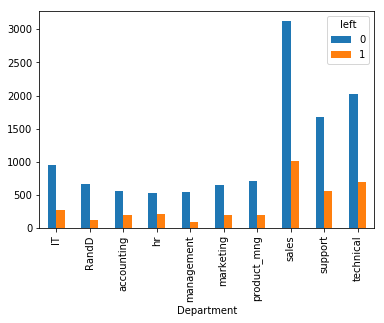

In [10]:
#Analyse Department
pd.crosstab(data['Department'],data['left']).plot(kind='bar')

In [11]:
#Salary vs left => high impact
#Department vs left => low impact(ignore)
sub_data = data.drop(['last_evaluation','number_project','time_spend_company','Work_accident','Department'],axis = 1)

In [12]:
sub_data.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [13]:
#Encode salary strings value into numeric
sub_data['salary']= sub_data['salary'].apply(lambda x: 0 if x=='low'else 1 if x=='medium' else 2)

In [14]:
X = sub_data.drop(['left'],axis = 1)
Y = sub_data['left']

In [15]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [16]:
#Train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
#Test the model
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [18]:
#Accuracy of the model:Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)


[[2170  129]
 [ 522  179]]


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.783
